# STUDENTS PERFORMANCE

# Hypothesis:

A student’s results in exams depend only on the actions performed by the child, and not on the of his parents background

# The dataset includes:

Gender: Useful for analyzing performance differences between male and female students.

Race/Ethnicity: Allows analysis of academic performance trends across different racial or ethnic groups.

Parental Level of Education: Indicates the educational background of the student's family.

Lunch: Shows whether students receive a free or reduced lunch, which is often a socioeconomic indicator.

Test Preparation Course: This tells whether students completed a test prep course, which could impact their performance.

Math Score: Provides a measure of each student’s performance in math, used to calculate averages or trends across various demographics.

Reading Score: Measures performance in reading, allowing for insights into literacy and comprehension levels among students.

Writing Score: Evaluates students' writing skills, which can be analyzed to assess overall literacy and expression.

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

!pip3 install pandas 

In [21]:
df = pd.read_csv("Cleaned_Students_Performance.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


# As it can be seen from row 24, the are no any missing values 

In [22]:
df.isna().sum() #считает пропуски 

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average_score                  0
dtype: int64

I replace the data in the column "gender", this will make the table easier to read

In [23]:
df['gender'] = df['gender'].replace(0, 'woman')
df['gender'] = df['gender'].replace(1, 'man')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,woman,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,woman,group C,some college,1,1,69,90,88,247,82.333333
2,woman,group B,master's degree,1,0,90,95,93,278,92.666667
3,man,group A,associate's degree,0,0,47,57,44,148,49.333333
4,man,group C,some college,1,0,76,78,75,229,76.333333


In [24]:
count_men = (df['gender'] == 'woman').sum()
count_woman = (df['gender'] == 'man').sum()
print(count_men, count_woman)

518 482


# As it can be seen from the diagrams, the higher the level of parental education, the higher the total score of the students

My hypothesis was proven wrong. Parental level of education greatly influences a student's score.

In [25]:
print(df[['parental_level_of_education', 'total_score']])

    parental_level_of_education  total_score
0             bachelor's degree          218
1                  some college          247
2               master's degree          278
3            associate's degree          148
4                  some college          229
..                          ...          ...
995             master's degree          282
996                 high school          172
997                 high school          195
998                some college          223
999                some college          249

[1000 rows x 2 columns]


In [26]:
print(df.loc[df['parental_level_of_education'] == 'high school', 'total_score'].mean())
print(df.loc[df['parental_level_of_education'] == 'some college', 'total_score'].mean())
print(df.loc[df['parental_level_of_education'] == 'associate\'s degree', 'total_score'].mean())
print(df.loc[df['parental_level_of_education'] == 'bachelor\'s degree', 'total_score'].mean())
print(df.loc[df['parental_level_of_education'] == 'master\'s degree', 'total_score'].mean())

189.2908163265306
205.42920353982302
208.7072072072072
215.77118644067798
220.79661016949152


  parental_level_of_education  total_score
0                 high school          189
1                some college          205
2          associate's degree          208
3           bachelor's degree          215
4             master's degree          220


([<matplotlib.axis.XTick at 0x136ea9bb0>,
 [Text(0, 0, 'high school'),
  Text(1, 0, 'some college'),
  Text(2, 0, "associate's degree"),
  Text(3, 0, "bachelor's degree"),
  Text(4, 0, "master's degree")])

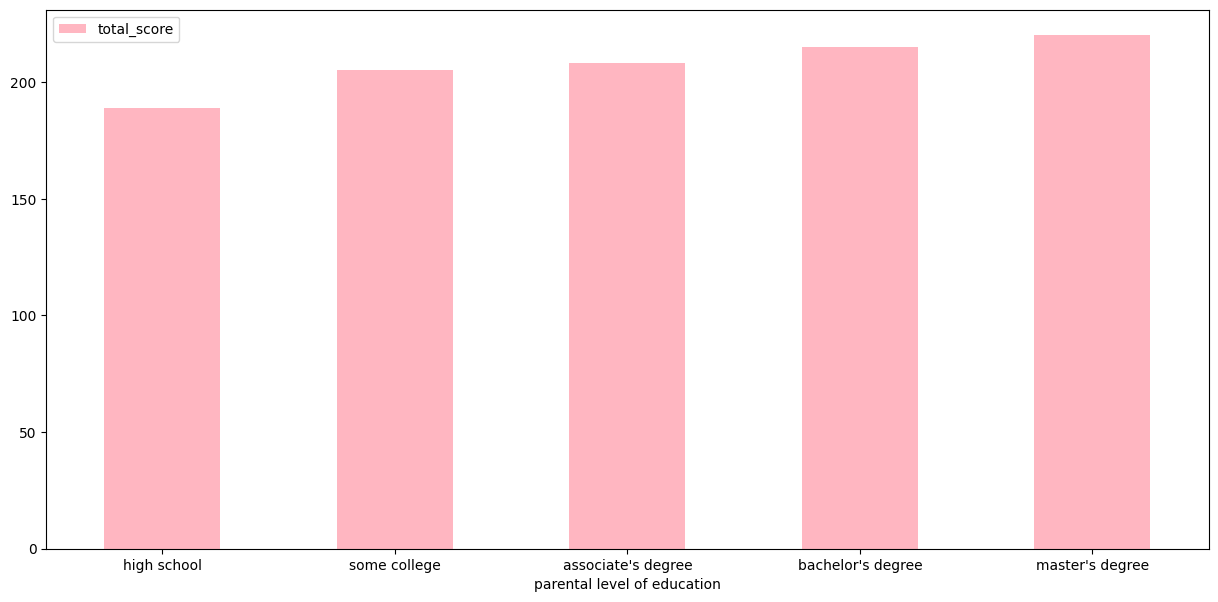

In [27]:
data = {
    'parental_level_of_education': ['high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'],
    'total_score': [189, 205, 208, 215, 220]
}

df = pd.DataFrame(data)
print(df)


df.plot(kind='bar', color='lightpink', xlabel= "parental level of education", figsize=(15, 7))
plt.xticks(np.arange(5), ("high school", "some college", "associate's degree", "bachelor's degree", "master's degree"), rotation=0)


/var/folders/ws/g23jxzg57bn68wtdfzhpgcyc0000gn/T/ipykernel_12045/3542878327.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_scores = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()


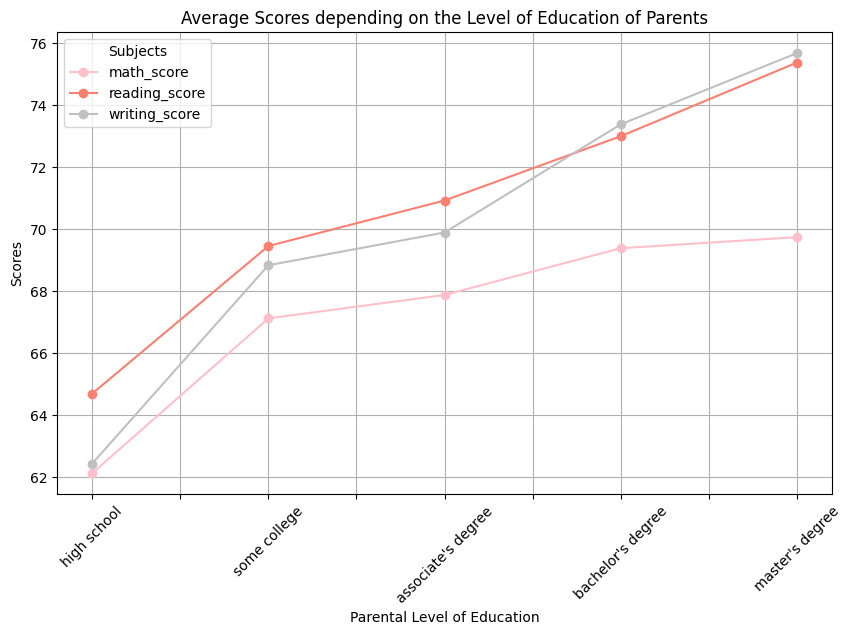

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('Cleaned_Students_Performance.csv')


education_order = ["high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]


df['parental_level_of_education'] = pd.Categorical(df['parental_level_of_education'], categories=education_order, ordered=True)


education_scores = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()


plt.figure(figsize=(10, 6))
education_scores.plot(kind='line', marker='o', color=['pink', 'salmon', 'silver'], ax=plt.gca())
plt.title('Average Scores depending on the Level of Education of Parents')
plt.xlabel('Parental Level of Education')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Subjects')
plt.show()


# As it can be seen from the diagram, students who have taken the preparation course have a higher total score than those, who have not taken it

In [28]:
df = pd.read_csv("Cleaned_Students_Performance.csv")
print(df.loc[df['test_preparation_course'] == 1, 'total_score'].mean())
print(df.loc[df['test_preparation_course'] == 0, 'total_score'].mean())

218.00837988826817
195.11682242990653


  test_preparation_course  total_score
0                     yes          218
1                      no          195


([<matplotlib.axis.YTick at 0x136e5aae0>,
 [Text(0, 0, 'yes'), Text(0, 1, 'no')])

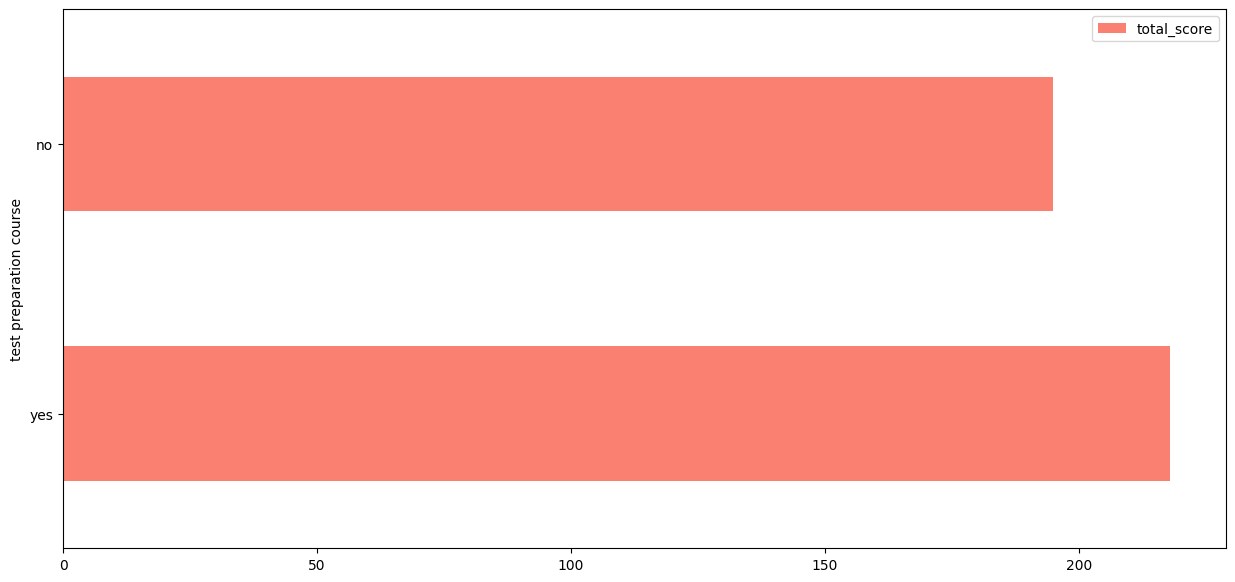

In [29]:
data = {
    'test_preparation_course': ["yes" , "no"],
    'total_score': [218, 195]
}

df = pd.DataFrame(data)
print(df)


df.plot(kind='barh', color="salmon", ylabel= "test preparation course", figsize=(15, 7))
plt.yticks(np.arange(2), ("yes", "no"), rotation=0)

It is obvious that taking the preparatory course guarantees the student a high score, but performance in which subjects exactly does this course affect? As it can be seen from the the diagram, completing the course influenced all disciplines, but “writing scores” most of all.

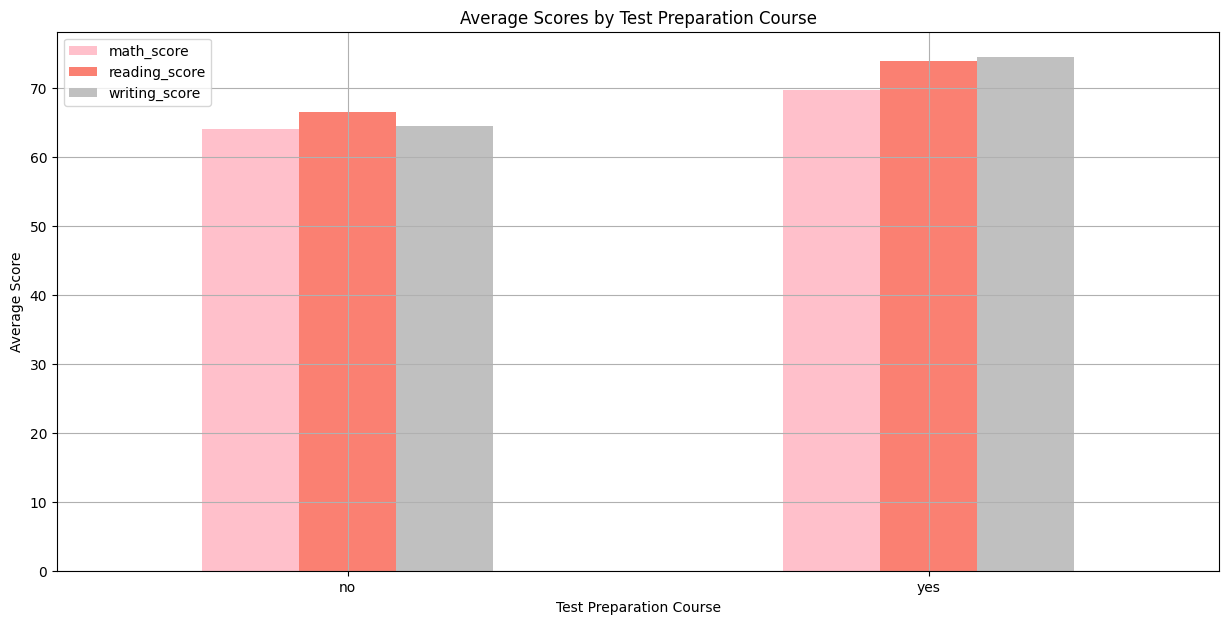

In [55]:
mean_scores = df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

ax = mean_scores.set_index('test_preparation_course').plot(kind='bar', color=['pink', 'salmon', 'silver'], figsize=(15, 7))

plt.title('Average Scores by Test Preparation Course')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')


ax.set_xticklabels(['no', 'yes'], rotation=0) 

plt.grid()
plt.show()

# As it can be seen from the diagram, that if students receive a free or reduced lunch, then they will have a higher total score than those, who don't

I think, that this is due to the fact that by receiving a free or reduced unch, the student can spend the saved money on tutors or additional courses for preparation.

In [30]:
df = pd.read_csv("Cleaned_Students_Performance.csv")
print(df.loc[df['lunch'] == 1, 'total_score'].mean())
print(df.loc[df['lunch'] == 0, 'total_score'].mean())

212.51162790697674
186.59718309859156


  lunch  total_score
0   yes          212
1    no          186


([<matplotlib.axis.YTick at 0x136f47aa0>,
 [Text(0, 0, 'yes'), Text(0, 1, 'no')])

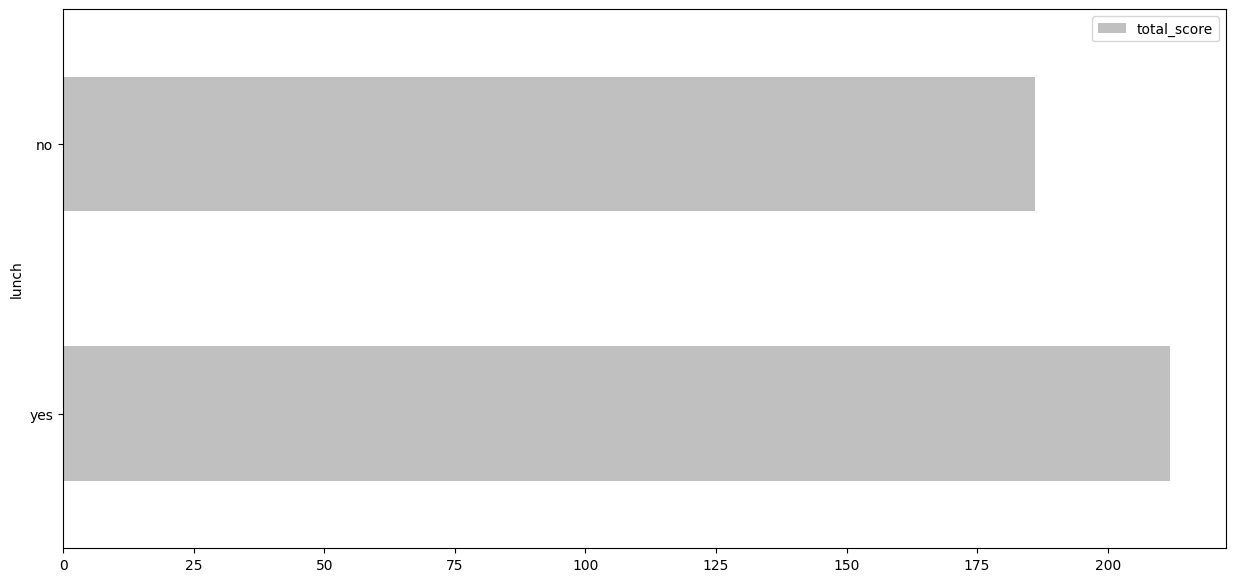

In [31]:
data = {
    'lunch': ["yes" , "no"],
    'total_score': [212, 186]
}

df = pd.DataFrame(data)
print(df)


df.plot(kind='barh', color='silver', ylabel= "lunch", figsize=(15, 7))
plt.yticks(np.arange(2), ("yes", "no"), rotation=0)

# As it can seen from the charts, a student's race/ethnicity also affects their score.

Text(0, 0.5, '')

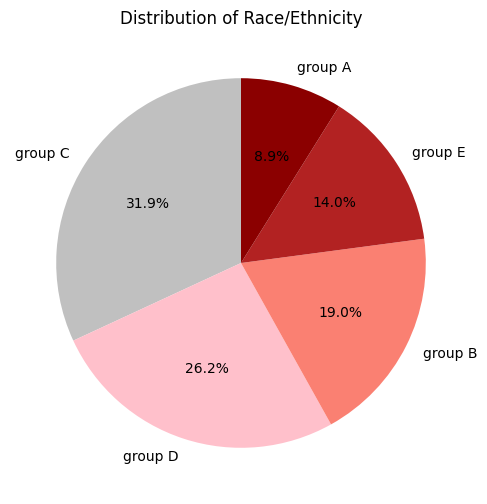

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('Cleaned_Students_Performance.csv')


race_counts = df['race_ethnicity'].value_counts()


plt.figure(figsize=(8, 6))
race_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors = ['silver', 'pink', 'salmon', 'firebrick', 'darkred'])
plt.title('Distribution of Race/Ethnicity')
plt.ylabel('')

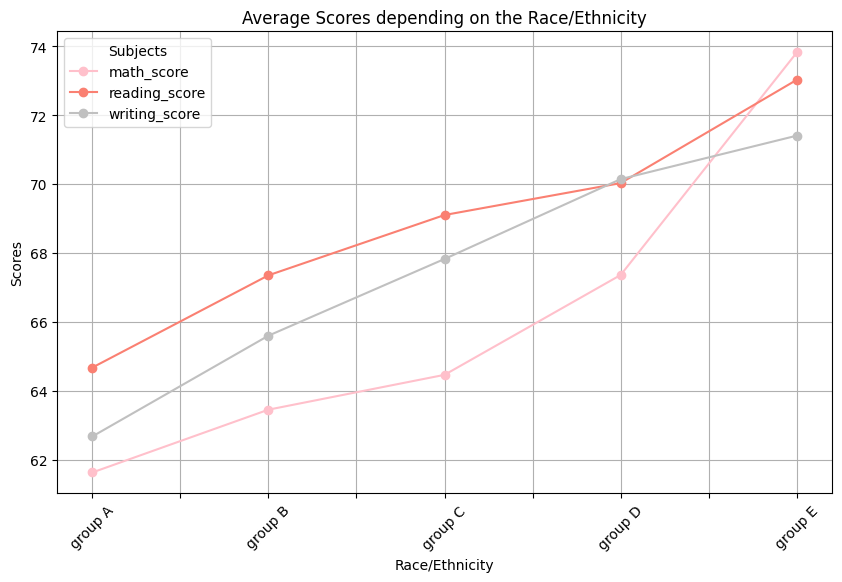

In [86]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('Cleaned_Students_Performance.csv')


education_scores = df.groupby('race_ethnicity')[['math_score', 'reading_score', 'writing_score']].mean()


plt.figure(figsize=(10, 6))
education_scores.plot(kind='line', marker='o', color=['pink', 'salmon', 'silver'], ax=plt.gca())
plt.title('Average Scores depending on the Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Scores')
plt.xticks(rotation=45) 
plt.grid() 
plt.legend(title='Subjects')  
plt.show()


# Conclusion: a student’s results are influenced by a huge number of factors, not everything depends only on the child!